# Mapping results Nath & Thingbaijam (2012)



In [2]:
%matplotlib inline
%load_ext autoreload

In [3]:
import os
import sys
import glob
import codecs
import warnings
import numpy as np
import pandas as pd
%autoreload 2
import toolbox as tb

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator

%autoreload 2
import oq_output.hazard_curve_converter as hcc
%autoreload 2
import oq_output.hazard_map_converter as hmc
from openquake.hazardlib import imt

In [4]:
map_imts = ['PGA','SA(0.2)','SA(1.0)']
map_tables = ['India_pga.csv','India_psa_pt2sec.csv','India_psa_1sec.csv']
model_path = '../Data/nath2012probabilistic'
map_table_list = [os.path.join(model_path, item) for item in map_tables]
map_table_df_list = [pd.read_csv(file_name) for file_name in map_table_list]

In [5]:
df_map = map_table_df_list[0][['lon', 'lat']]
map_csv = 'NT2012_Figure_7_Indian_subcontinent_lon_lat.csv'
print('sites_csv = %s' % map_csv)
df_map.to_csv(map_csv, header=False, index=False, float_format='%g')

sites_csv = NT2012_Figure_7_Indian_subcontinent_lon_lat.csv


In [6]:
poes_nom = np.array([0.1, 0.02])
T_nom = 50  # years
rate = -np.log(1 - poes_nom)/T_nom  # per year
T_inv = 1.  # year
poes_inv = 1 - np.exp(-rate*T_inv)
poe_labels = ['%g%% in %g years' % (100*poe, T_nom) for poe in poes_nom]

print('investigation_time = %s' % str(T_inv))
print('poes = %s' % ' '.join(['%.5g' % poe for poe in poes_inv]))
print(poe_labels)

investigation_time = 1.0
poes = 0.002105 0.00040397
['10% in 50 years', '2% in 50 years']


In [17]:
im_types = [imt.from_string(item) for item in ['PGA', 'SA(0.2)', 'SA(1.0)']]
im_levels = tb.logspace(0.004, 5, 6)

print('intensity_measure_types_and_levels = {%s}' 
      % ', '.join(['"%s": [%s]' % (str(im_type), ', '.join([str(iml) for iml in im_levels])) 
                   for im_type in im_types]))

intensity_measure_types_and_levels = {"PGA": [0.0047, 0.0068, 0.01, 0.015, 0.022, 0.033, 0.047, 0.068, 0.1, 0.15, 0.22, 0.33, 0.47, 0.68, 1.0, 1.5, 2.2, 3.3, 4.7], "SA(0.2)": [0.0047, 0.0068, 0.01, 0.015, 0.022, 0.033, 0.047, 0.068, 0.1, 0.15, 0.22, 0.33, 0.47, 0.68, 1.0, 1.5, 2.2, 3.3, 4.7], "SA(1.0)": [0.0047, 0.0068, 0.01, 0.015, 0.022, 0.033, 0.047, 0.068, 0.1, 0.15, 0.22, 0.33, 0.47, 0.68, 1.0, 1.5, 2.2, 3.3, 4.7]}


In [18]:
# areal_only_no_fmd_uncertainty_map
n_gmpe_lt_rlzs = 3*3*2*2*3*2*3*3*2
print('n_gmpe_lt_rlzs = %d' % n_gmpe_lt_rlzs)
n_src_lt_rlzs = 2
print('n_src_lt_rlzs = %d' % n_src_lt_rlzs)
n_lt_rlzs = n_gmpe_lt_rlzs*n_src_lt_rlzs
print('n_lt_rlzs = %d' % n_lt_rlzs)
n_sites = len(df_map)
print('n_sites = %d' % n_sites)
n_imt_iml = len(im_types)*len(im_levels)
print('n_imt_iml = %dx%d = %d' % (len(im_types),len(im_levels),n_imt_iml))
n_curves = n_lt_rlzs*n_sites*n_imt_iml
print('n_curves = n_lt_rlzs*n_sites*n_imt_iml = %d*%d*%d = %d' %
     (n_lt_rlzs, n_sites, n_imt_iml, n_curves))
n_files = n_lt_rlzs*n_imt_iml
print('n_files = n_lt_rlzs*n_imt_iml = %d*%d = %d' %
     (n_lt_rlzs, n_imt_iml, n_files))

n_gmpe_lt_rlzs = 3888
n_src_lt_rlzs = 2
n_lt_rlzs = 7776
n_sites = 8102
n_imt_iml = 3x19 = 57
n_curves = n_lt_rlzs*n_sites*n_imt_iml = 7776*8102*57 = 3591065664
n_files = n_lt_rlzs*n_imt_iml = 7776*57 = 443232


## Post-Processing

In [28]:
CALC_ID = 8952
export_dir = '../HazardOutputs'
calc_name = 'calc_%d' % CALC_ID
export_path = os.path.join(os.path.abspath(export_dir), calc_name)

exported_files = [os.path.join(dir_path, f)
    for dir_path, dirnames, files in os.walk(export_path)
    for f in files if f.endswith('.xml')]
exported_files
print export_path

/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952


In [20]:
subset_keys = ['hazard_map', 'mean']
output_subset = [item for item in exported_files 
                 if all(key in item for key in subset_keys)]
output_subset

['/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952/hazard_map-mean-0.00040397-SA(1.0)_8952.xml',
 '/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952/hazard_map-mean-0.002105-SA(0.2)_8952.xml',
 '/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952/hazard_map-mean-0.00040397-SA(0.2)_8952.xml',
 '/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952/hazard_map-mean-0.002105-PGA_8952.xml',
 '/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952/hazard_map-mean-0.00040397-PGA_8952.xml',
 '/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952/hazard_map-mean-0.002105-SA(1.0)_8952.xml']

In [21]:
map_csv_list = [hmc.save_hazard_map_to_csv(file_name, 
                                           force_overwrite=True) 
                for file_name in output_subset]

In [22]:
map_csv_list

['/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952/hazard_map-mean-0.00040397-SA(1.0)_8952.csv',
 '/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952/hazard_map-mean-0.002105-SA(0.2)_8952.csv',
 '/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952/hazard_map-mean-0.00040397-SA(0.2)_8952.csv',
 '/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952/hazard_map-mean-0.002105-PGA_8952.csv',
 '/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952/hazard_map-mean-0.00040397-PGA_8952.csv',
 '/home/nick/Desktop/Individual Study/HazardOutputs/calc_8952/hazard_map-mean-0.002105-SA(1.0)_8952.csv']

In [23]:
minimum = np.inf
maximum = 0
for map_csv in map_csv_list:
    df_gm = pd.read_csv(map_csv, header=1)
    minimum = min(minimum, df_gm[df_gm['iml'] != 0]['iml'].min())
    maximum = max(maximum, df_gm['iml'].max())
    
limits = (minimum, maximum)
limits = tb.stdval(limits, 3)
print "IML limits:", limits

IML limits: [ 0.005  2.   ]


In [25]:
print imt_name, poe_name

SA-0.2 0.00210


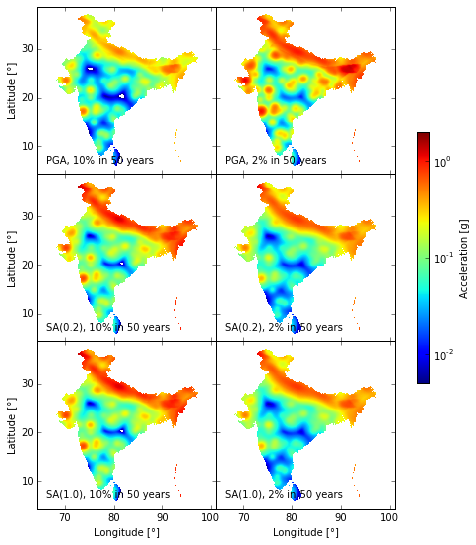

In [29]:
fig, axes = plt.subplots(len(im_types), len(poes_inv), 
                         figsize=(4*len(poes_inv),3*len(im_types)), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'datalim', 'aspect': 1})
fig.subplots_adjust(hspace=0, wspace=0)
for i, im_type in enumerate(im_types):
    for j, (poe_inv, poe_nom) in enumerate(zip(poes_inv, poes_nom)):
        fig.sca(axes[i, j])
        
        imt_poe_label = '%s, %g%% in %g years' % (str(im_type), 
                                                  100*poe_nom, T_nom)
        tb.annotate(imt_poe_label, 'lower left')
        
        # figure out corresponding output file name
        imt_name = im_type.__class__.__name__
        if imt_name == 'SA':
            imt_name == 'SA(%s)' % str(im_type.period)
        poe_name = ('%.4g' % poe_inv)[:-1]
        map_csv = [item for item in map_csv_list 
                   if imt_name in item and poe_name in item][0]        
        df_gm = pd.read_csv(map_csv, header=1)
        
        grid_step = np.mean(np.diff(sorted(list(set(df_gm['lat'])))))
        point_size = (grid_step/0.2)**2
        im = plt.scatter(df_gm['lon'], df_gm['lat'], c=df_gm['iml'].values, 
                         s=point_size, marker='s', edgecolor='none', cmap='jet', 
                         norm=LogNorm(limits[0], limits[1]))

plt.gca().set_aspect('equal')
plt.autoscale(enable=True, axis=u'both', tight=True)
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.5, label='Acceleration [g]')
        
[ax.set_xlabel(u'Longitude [°]') for ax in axes[-1, :]]
[ax.xaxis.set_major_locator(MultipleLocator(base=10.)) for ax in axes[-1, :]]
[ax.set_ylabel(u'Latitude [°]') for ax in axes[:, 0]]
[ax.yaxis.set_major_locator(MultipleLocator(base=10.)) for ax in axes[:, 0]]
fig.savefig('map_' + calc_name + '.pdf', dpi=300, bbox_inches='tight')

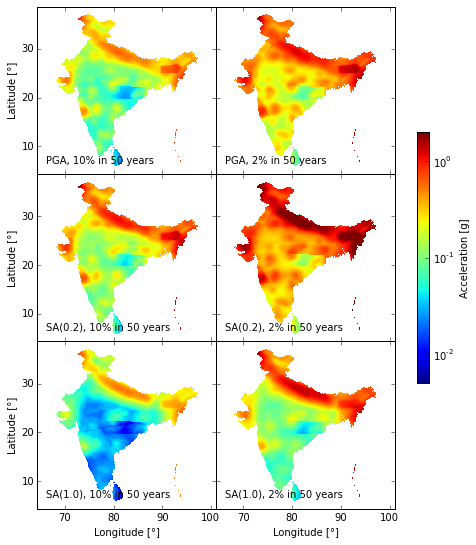

In [27]:
model_path = '../Data/nath2012probabilistic'
map_files = ['India_pga.csv', 
             'India_psa_pt2sec.csv', 
             'India_psa_1sec.csv']

fig, axes = plt.subplots(len(im_types), len(poes_inv), 
                         figsize=(4*len(poes_inv),3*len(im_types)), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'datalim', 'aspect': 1})
fig.subplots_adjust(hspace=0, wspace=0)
for i, (im_type, map_file) in enumerate(zip(im_types, map_files)):
    for j, (poe_inv, poe_nom) in enumerate(zip(poes_inv, poes_nom)):
        fig.sca(axes[i, j])
        
        imt_poe_label = '%s, %g%% in %g years' % (str(im_type), 
                                                  100*poe_nom, T_nom)
        tb.annotate(imt_poe_label, 'lower left')
        
        # figure out corresponding output file name        
        df_gm = pd.read_csv(os.path.join(model_path, map_file))
        col_name = 'prob' + '%g' % (100*poe_nom)
        col_name = col_name.replace('prob0.','prob_pt')
        
        grid_step = np.mean(np.diff(sorted(list(set(df_gm['lat'])))))
        point_size = (grid_step/0.2)**2
        im = plt.scatter(df_gm['lon'], df_gm['lat'], c=df_gm[col_name].values, 
                         s=point_size, marker='s', edgecolor='none', cmap='jet', 
                         norm=LogNorm(limits[0], limits[1]))

plt.gca().set_aspect('equal')
plt.autoscale(enable=True, axis=u'both', tight=True)
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.5, label='Acceleration [g]')
        
[ax.set_xlabel(u'Longitude [°]') for ax in axes[-1, :]]
[ax.xaxis.set_major_locator(MultipleLocator(base=10.)) for ax in axes[-1, :]]
[ax.set_ylabel(u'Latitude [°]') for ax in axes[:, 0]]
[ax.yaxis.set_major_locator(MultipleLocator(base=10.)) for ax in axes[:, 0]]
fig.savefig('map_published.pdf', dpi=300, bbox_inches='tight')